## GET AND CLEAN THE DATA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import copy
import re
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# Put the data in a dataframe 
df_2022 = pd.read_csv('./Data/survey_results_public_2022.csv')
df_2021 = pd.read_csv('./Data/survey_results_public_2021.csv')
df_2020 = pd.read_csv('./Data/survey_results_public_2020.csv')
df_2019 = pd.read_csv('./Data/survey_results_public_2019.csv')
df_2018 = pd.read_csv('./Data/survey_results_public_2018.csv')
df_2017 = pd.read_csv('./Data/survey_results_public_2017.csv')
df_2016 = pd.read_csv('./Data/2016.csv')

data = [("2022", df_2022), ("2021", df_2021), ("2020", df_2020), ("2019", df_2019), ("2018", df_2018), ("2017", df_2017), ("2016", df_2016)]
data.reverse()

C:\Users\annar\AppData\Local\Temp\ipykernel_21680\1828188132.py:6: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('./Data/survey_results_public_2018.csv')


In [3]:
# Print some initial exploring of the data
stats_part = []
for df in data:
    print("Number of features/columns ", df[0], ":", df[1].shape[1])
    print("Number of observations/rows ", df[0], ":", df[1].shape[0], "\n")
    print(sorted(list(df[1].columns)), "\n")
    stats_part.append(df[1].shape[0])

print(sum(stats_part))

Number of features/columns  2016 : 66
Number of observations/rows  2016 : 56030 

['Unnamed: 0', 'age_midpoint', 'age_range', 'agree_adblocker', 'agree_alcohol', 'agree_diversity', 'agree_legacy', 'agree_loveboss', 'agree_mars', 'agree_nightcode', 'agree_notice', 'agree_problemsolving', 'agree_tech', 'aliens', 'big_mac_index', 'collector', 'commit_frequency', 'company_size_range', 'country', 'desktop_os', 'dev_environment', 'developer_challenges', 'dogs_vs_cats', 'education', 'employment_status', 'experience_midpoint', 'experience_range', 'gender', 'hobby', 'how_to_improve_interview_process', 'important_buildexisting', 'important_buildnew', 'important_companymission', 'important_control', 'important_newtech', 'important_ownoffice', 'important_promotion', 'important_sameend', 'important_variety', 'important_wfh', 'industry', 'interview_likelihood', 'job_discovery', 'job_satisfaction', 'job_search_annoyance', 'new_job_value', 'occupation', 'occupation_group', 'open_to_new_job', 'programm

In [9]:
# Column names for comparison
gender = "Gender"
languageHaveWorkedWith = "LanguageHaveWorkedWith"
languageWantToWorkWith = "LanguageWantToWorkWith"
webframeHaveWorkedWith = "WebframeHaveWorkedWith"
webframeWantToWorkWith = "WebframeWantToWorkWith"
platformHaveWorkedWith = "PlatformHaveWorkedWith"
platformWantToWorkWith = "PlatformWantToWorkWith"
databaseHaveWorkedWith = "DatabaseHaveWorkedWith"
country = "Country"

# rename cols for comparison 
df_2020 = df_2020.rename(columns={
    "LanguageWorkedWith": languageHaveWorkedWith, 
    'LanguageDesireNextYear': languageWantToWorkWith, 
    "PlatformWorkedWith": platformHaveWorkedWith, 
    'PlatformDesireNextYear': platformWantToWorkWith,
    "WebframeWorkedWith": webframeHaveWorkedWith,
    'WebframeDesireNextYear': webframeWantToWorkWith,
    'DatabaseWorkedWith': databaseHaveWorkedWith
    })
df_2019 = df_2019.rename(columns={
    "LanguageWorkedWith": languageHaveWorkedWith, 
    'LanguageDesireNextYear': languageWantToWorkWith, 
    "PlatformWorkedWith": platformHaveWorkedWith, 
    'PlatformDesireNextYear': platformWantToWorkWith,
    "WebFrameWorkedWith": webframeHaveWorkedWith,
    'WebFrameDesireNextYear': webframeWantToWorkWith,
    'DatabaseWorkedWith': databaseHaveWorkedWith
    })
df_2018 = df_2018.rename(columns={
    "LanguageWorkedWith": languageHaveWorkedWith, 
    'LanguageDesireNextYear': languageWantToWorkWith, 
    "FrameworkWorkedWith": webframeHaveWorkedWith, 
    'FrameworkDesireNextYear': webframeWantToWorkWith,
    "PlatformWorkedWith": platformHaveWorkedWith,
    'PlatformDesireNextYear': platformWantToWorkWith,
    'DatabaseWorkedWith': databaseHaveWorkedWith 
    })
df_2017 = df_2017.rename(columns={
    "HaveWorkedLanguage": languageHaveWorkedWith, 
    'WantWorkLanguage': languageWantToWorkWith, 
    "HaveWorkedFramework": webframeHaveWorkedWith, 
    'HaveWorkedPlatform': platformHaveWorkedWith,
    'WantWorkFramework': webframeWantToWorkWith,
    'WantWorkPlatform': platformWantToWorkWith,
    'HaveWorkedDatabase': databaseHaveWorkedWith 
    })

df_2016 = df_2016.rename(columns={
    'tech_want': languageWantToWorkWith, 
    'gender': "Gender",
    'country': "Country"
    })

df_2016[languageHaveWorkedWith] = df_2016["tech_do"]
df_2016[webframeHaveWorkedWith] = df_2016[languageHaveWorkedWith]
df_2016[platformHaveWorkedWith] = df_2016[languageHaveWorkedWith]
df_2016[databaseHaveWorkedWith] = df_2016[languageHaveWorkedWith]

cols = [gender, languageHaveWorkedWith, languageWantToWorkWith, webframeHaveWorkedWith, platformHaveWorkedWith, country]
data_compare_cols = [("2022", df_2022), ("2021", df_2021), ("2020", df_2020), ("2019", df_2019), ("2018", df_2018), ("2017", df_2017), ("2016", df_2016)]
data_compare_cols.reverse()

# Clean dfs based on how many questions they answered (must have answereed at least 75% of questions)
for i in range(len(data_compare_cols)):
    data_compare_cols[i] = (data_compare_cols[i][0], data_compare_cols[i][1].dropna(thresh=(0.25 * data_compare_cols[i][1].shape[1])))
    print("Number of observations/rows ", data_compare_cols[i][0], ":", data_compare_cols[i][1].shape[0], "vs", data[i][1].shape[0])

stats_part_after = []

# Clean dfs Based on if they found the answers confusing or difficult
ease_col = ["SurveyEase", "SurveyEasy", "QuestionsConfusing"]
for i in range(len(data_compare_cols)):
    for col_name in ease_col:
        if col_name in list(data_compare_cols[i][1].columns):
            df_temp = data_compare_cols[i][1][ 
            (data_compare_cols[i][1][col_name] != ('Very difficult')) & 
            (data_compare_cols[i][1][col_name] != ('Difficult')) &
            (data_compare_cols[i][1][col_name] != ('Strongly agree'))
            ]
            data_compare_cols[i] = (data_compare_cols[i][0], df_temp)
          
    stats_part_after.append(data_compare_cols[i][1].shape[0])
    print("Number of observations/rows ", data_compare_cols[i][0], ":", data_compare_cols[i][1].shape[0])

print(sum(stats_part)-sum(stats_part_after))

Number of observations/rows  2016 : 49667 vs 56030
Number of observations/rows  2017 : 41079 vs 51392
Number of observations/rows  2018 : 78940 vs 98855
Number of observations/rows  2019 : 88629 vs 88883
Number of observations/rows  2020 : 59735 vs 64461
Number of observations/rows  2021 : 83401 vs 83439
Number of observations/rows  2022 : 71689 vs 73268
Number of observations/rows  2016 : 49667
Number of observations/rows  2017 : 40915
Number of observations/rows  2018 : 78465
Number of observations/rows  2019 : 86933
Number of observations/rows  2020 : 59035
Number of observations/rows  2021 : 82635
Number of observations/rows  2022 : 70694
47984


## Study trends

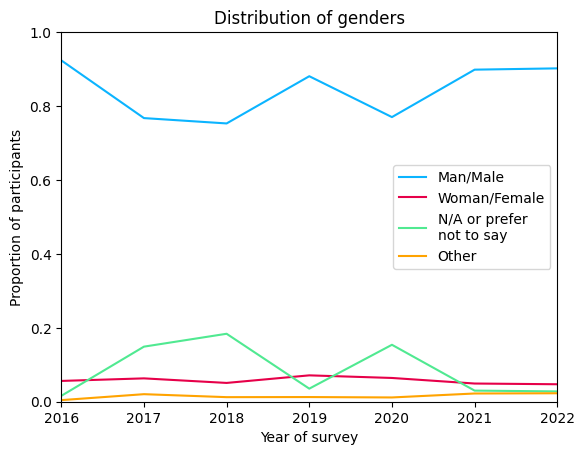

All unique genders over the years ['Female' 'Gender non-conforming' 'Male' 'Man' 'Multiple'
 'Non-binary, genderqueer, or gender non-conforming'
 'Or, in your own words:' 'Other' 'Transgender' 'Woman' 'nan']


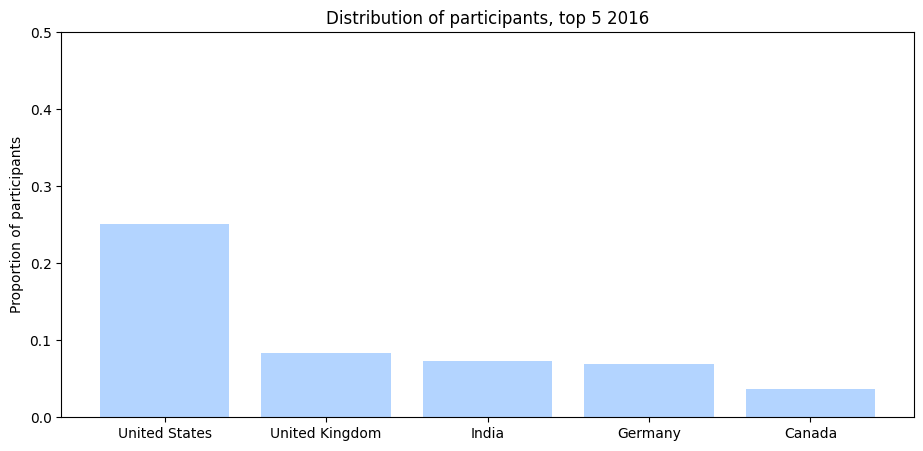

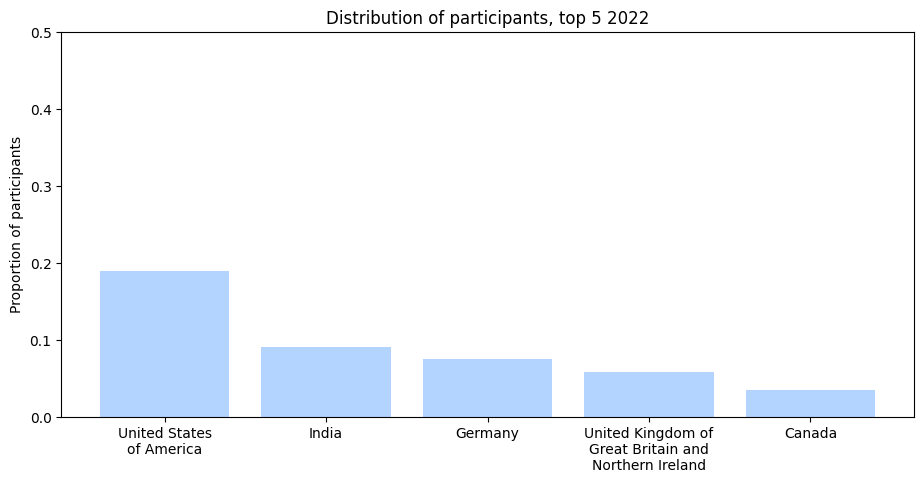

Mean partipicapnt per country:  295.63690476190476


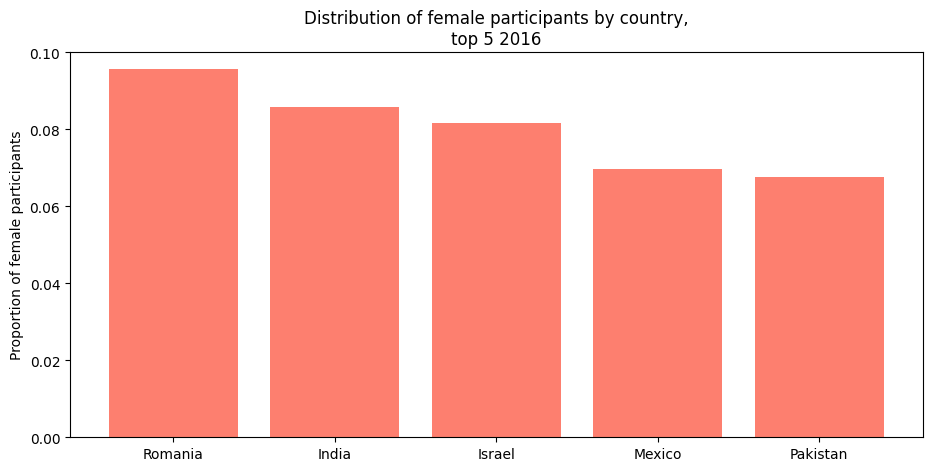

Mean partipicapnt per country:  392.74444444444447


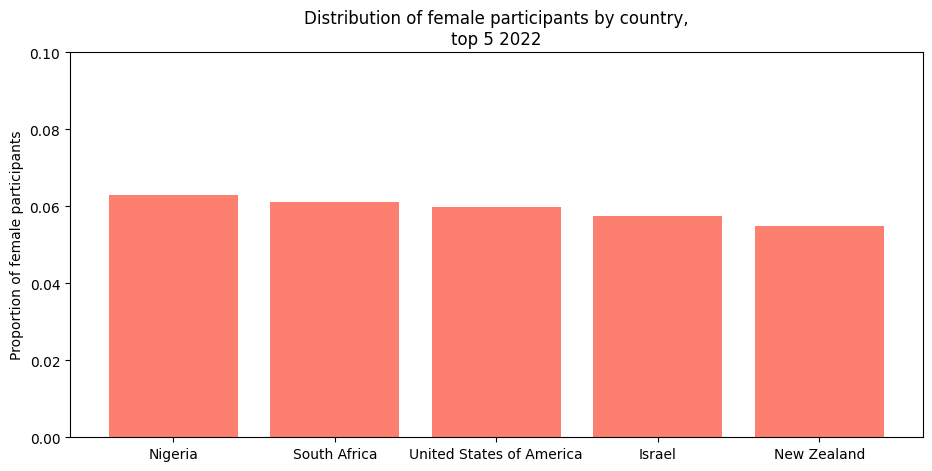

In [5]:
# Question Change in gender
man = []
woman = []
other = []
nan = []
years = []
total = []
all_indexes = []

print("\n")
# Prop men
for df in data_compare_cols:
    df_col = df[1][gender] 

    # Sum same ansvers and count multiple answers as one group (eg, someone wrote both man and woman) (clean data issue)
    total_answers = []
    for answer in df_col:
        multiple_picks = str(answer).split(";")

        if (multiple_picks[0] == 'Prefer not to disclose') or (multiple_picks[0] == 'Prefer not to say'):
            total_answers.append("nan")
        elif (len(multiple_picks) == 1):
            total_answers.append(multiple_picks[0])
        else:
            total_answers.append("Multiple")

    answer_count = pd.Series(total_answers).value_counts()
    all_indexes += list(answer_count.index)

    if "Man" in  answer_count.index: 
        man.append(answer_count.loc["Man"]/answer_count.sum())
    elif "Male" in  answer_count.index:
        man.append(answer_count.loc["Male"]/answer_count.sum())

    if "Woman" in  answer_count.index: 
        woman.append(answer_count.loc["Woman"]/answer_count.sum())
    elif "Female" in  answer_count.index:
        woman.append(answer_count.loc["Female"]/answer_count.sum())

    if "nan" in  answer_count.index: 
        nan.append(answer_count.loc["nan"]/answer_count.sum())
    
    other.append((1-man[-1]-woman[-1]-nan[-1]))
    years.append(int(df[0]))

# See change
fig, ax = plt.subplots()
plt.plot(years, man, color="#0bb4ff", label="Man/Male")
plt.plot(years, woman, color="#e60049", label="Woman/Female")
plt.plot(years, nan, color="#50e991", label="N/A or prefer\nnot to say")
plt.plot(years, other, color="#ffa300", label="Other")
plt.legend(loc='best')
plt.title('Distribution of genders')
ax.set_xlabel('Year of survey')
ax.set_ylabel('Proportion of participants')
plt.ylim(0,1)
plt.xlim(2016,2022)
plt.show()

answer_count = pd.Series(total_answers).value_counts()
print('All unique genders over the years',  np.unique(np.array(all_indexes)))


for df in data_compare_cols:
    df_col = df[1][country] 

    # Sum same ansvers and count multiple answers as one group (eg, someone wrote both man and woman) (clean data issue)
    total_answers = []
    for answer in df_col:
        multiple_picks = str(answer).split(";")

        if(multiple_picks[0] == "United States of America"):
            total_answers.append("United States\nof America")
        elif(multiple_picks[0] == "United Kingdom of Great Britain and Northern Ireland"):
            total_answers.append("United Kingdom of\nGreat Britain and\nNorthern Ireland")
        elif (len(multiple_picks) == 1):
            total_answers.append(multiple_picks[0])
        else:
            total_answers.append("Multiple options")

    answer_count = pd.Series(total_answers).value_counts(normalize=True).head(5)
    all_indexes += list(answer_count.index)

    
    if (df[0] == "2016" or df[0] == "2022"):
        # Make bar graph
        plt.rcParams.update(plt.rcParamsDefault)
        plt.rc('figure', figsize=(11, 5))
        fig, ax = plt.subplots()
        plt.bar(answer_count.index, answer_count.values, color="#b3d4ff")
        plt.title("Distribution of participants, top " + str(answer_count.shape[0]) + " " + str(df[0]))
        plt.ylim(0,0.5)
        ax.set_ylabel('Proportion of participants')
        # plt.xticks(fontsize=8, rotation=90)
        plt.show()


def isWoman(x):
    if x == "Woman":
        return True
    elif x == "Female":
        return True
    return False


for df in data_compare_cols:
    
    if (df[0] == "2022") or (df[0] == "2016"):
        df_temp_2 = copy.copy(df[1][[country, gender]])
        df_temp_2["Woman"] = df_temp_2["Gender"].apply(isWoman)

        country_dict = {}

        for index, row in df_temp_2.iterrows():
            if not row[country] in country_dict:
                country_dict[row[country]] = {
                    "Women": 0,
                    "Other": 0,
                    "Sum": 0,
                    "P_women": 0,
                }

            if bool(row['Woman']):
                country_dict[row[country]]["Women"] += 1
            else:
                country_dict[row[country]]["Other"] += 1
            
            country_dict[row[country]]["Sum"] += 1
            country_dict[row[country]]["P_women"] =  country_dict[row[country]]["Women"]/country_dict[row[country]]["Sum"]
    
        total_answers = []
        for answer in df_temp_2[country]:
            multiple_picks = str(answer).split(";")
   
            if (len(multiple_picks) == 1):
                total_answers.append(multiple_picks[0])

        answer_count = pd.Series(total_answers).value_counts()    
        answer_count_mean =  answer_count.mean()
        answer_count_to_drop = answer_count[answer_count <= answer_count_mean].index

        d_s = dict(sorted(country_dict.items(), key=lambda item: item[1]["P_women"], reverse=True))
        
        for con in answer_count_to_drop:
            d_s.pop(con, None)             

        print("Mean partipicapnt per country: ",  answer_count_mean)

        countries = []
        proportion_w = []

        counter = 0
        for key, value in d_s.items():
            if counter < 5:
                countries.append(key)
                proportion_w.append(value["P_women"])
            counter += 1
        
        # (with above mean no of participants)
        # Make bar graph
        fig, ax = plt.subplots()
        plt.bar(countries, proportion_w, color="#fd7f6f")
        plt.title("Distribution of female participants by country,\ntop 5 " + str(df[0]))
        ax.set_ylabel('Proportion of female participants')
        plt.ylim(0,0.1)
        plt.show()


,index,Have2016,Want2016,Have2017,Want2017,Have2018,Want2018,Have2019,Want2019,Have2020,Want2020,Have2021,Want2021,Have2022,Want2022
0,javascript,55.12,36.26,55.57,39.70,65.69,46.39,66.91,50.52,64.13,43.26,64.34,44.45,64.84,44.03
1,sql,44.22,21.21,45.60,27.28,53.82,33.91,53.75,37.96,51.94,33.05,46.63,32.00,49.07,34.65
2,java,36.11,24.76,35.20,24.24,42.26,26.90,40.45,26.45,37.98,21.77,34.95,20.60,32.95,18.57
3,c#,30.76,24.37,30.28,24.75,32.45,24.79,30.68,25.43,29.86,22.73,27.61,21.63,27.78,21.93
4,php,25.71,13.17,24.93,12.99,28.54,14.50,25.94,14.45,24.65,11.62,21.72,10.59,20.66,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,deno,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.27,5.18
126,fortran,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.89,0.61
127,colocation,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.88,0.73
128,playframework,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.62,0.50


['.netcore', 'amazonecho', 'android', 'angular', 'apl', 'applewatchorappletv', 'arduino', 'asp.net', 'assembly', 'aws', 'azure', 'bash/shell', 'blazor', 'c', 'c#', 'c++', 'cassandra', 'clojure', 'cobol', 'coffeescript', 'colocation', 'commonlisp', 'cordova', 'crystal', 'css', 'dart', 'delphi', 'delphi/objectpascal', 'deno', 'digitalocean', 'django', 'docker', 'drupal', 'elixir', 'erlang', 'esp8266', 'express', 'f#', 'fastapi', 'fastify', 'firebase', 'flask', 'fortran', 'gamingconsole', 'gatsby', 'go', 'googleappengine', 'googlecloud', 'googlehome', 'groovy', 'hack', 'hadoop', 'haskell', 'heroku', 'html/css', 'ibmcloudorwatson', 'ios', 'java', 'javascript', 'jquery', 'julia', 'kotlin', 'kubernetes', 'lamp', 'laravel', 'linode', 'linux', 'lisp', 'lua', 'macos', 'mainframe', 'managedhosting', 'matlab', 'microsoftazure', 'mongodb', 'next', 'node', 'nuxt', 'objective-c', 'ocaml', 'openstack', 'oraclecloudinfrastructure', 'other(s):', 'ovh', 'perl', 'phoenix', 'php', 'playframework', 'powers

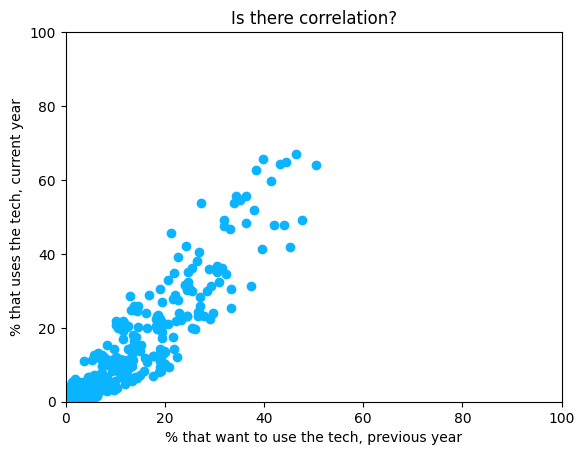

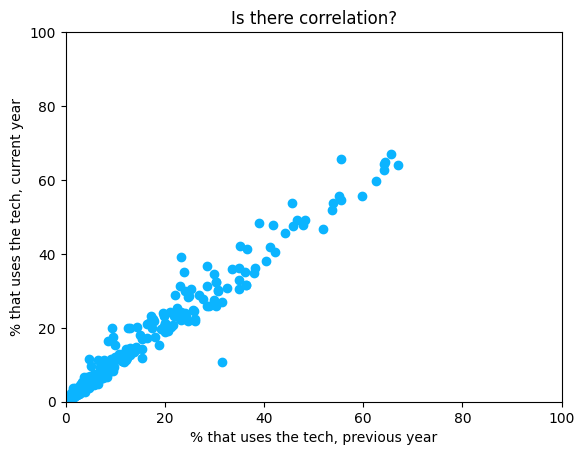

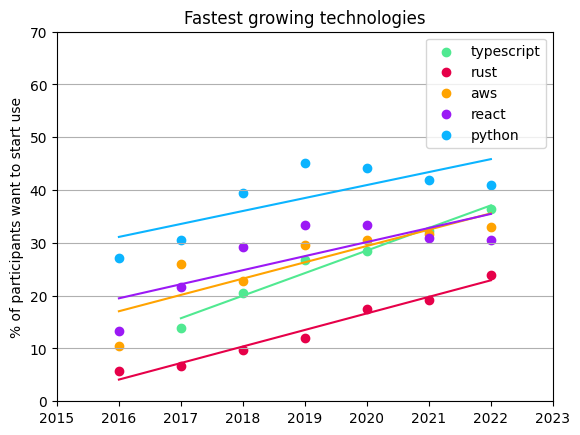

0.7677868499828218 0.04384199148287918 0.9164536796471365
-0.9709021077256956 0.0002730888651095187 0.10940084971501543


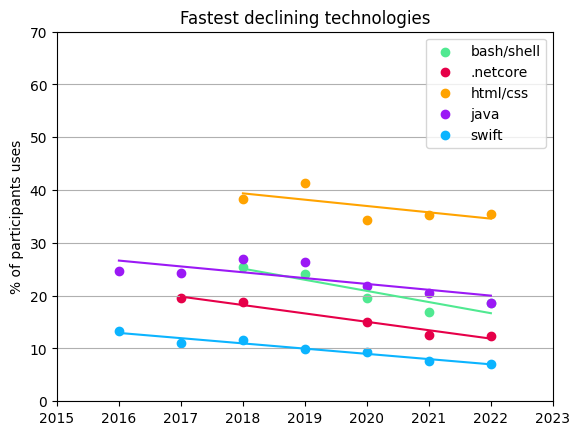

,Tech,Prediction % 2023,Coefficient of determination,Standard error
0,typescript,41,0.9662,0.3997
1,rust,26,0.9714,0.2406
2,aws,39,0.7329,0.8342
3,react,38,0.6030,0.9666
4,python,48,0.5895,0.9165
5,bash/shell,15,0.8119,0.5861
6,.netcore,10,0.9620,0.1827
7,html/css,33,0.4243,0.8050
8,java,19,0.5920,0.4107
9,swift,6,0.9427,0.1094


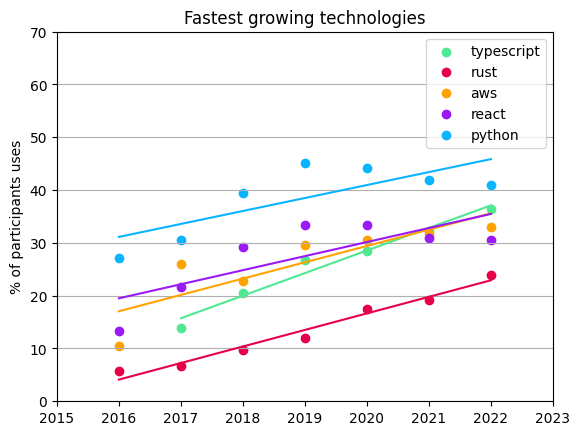

In [7]:
years = []
rows = []
total_answer_counts = []

for df in data_compare_cols:
    rows.append(df[1].shape[0])
    years.append(int(df[0])) 

    def get_proportion(x):
        return round(x/int(df[1].shape[0]), 4)*100

    cols = []
    cols_want = []
    if df[0] == "2016":
        cols = [languageHaveWorkedWith]
        cols_want = [languageWantToWorkWith]
    else:
        cols = [languageHaveWorkedWith, webframeHaveWorkedWith, platformHaveWorkedWith]
        cols_want = [languageWantToWorkWith, webframeWantToWorkWith, platformWantToWorkWith]

    total_answers = []
    answer_counts = []
    ########################################################
    for col in cols:
        df_col = df[1][col].str.lower()

        for answer in df_col:
            # Seperate "multiple answer" answers and append all answers in a joint list
            multiple_picks = re.split(";", str(answer)) 
            for pick in multiple_picks:
                replace_list = [" ", ".js", "js", "platform", "desktop"]
                for r in replace_list:
                    pick = pick.replace(r, "")
                if pick == 'reactjs':
                    total_answers.append("react")
                elif pick == 'microsoftazure(tables,cosmosdb,sql,etc)':
                    total_answers.append("azure")
                elif pick == 'asp.netcore':
                    total_answers.append(".netcore")  
                elif pick == 'amazonwebservices(aws)':
                    total_answers.append("aws")  
                elif pick == 'cloud(aws,gae,azure,etc.)':
                    total_answers.append("azure")
                    total_answers.append("aws")  
                    total_answers.append("googleappengine")  
                elif pick == 'angular/angular':
                    total_answers.append("angular")
                elif pick == 'bash/shell/powershell':
                    total_answers.append("bash/shell")
                    total_answers.append("powershell")
                elif pick == 'arduino/raspberrypi':
                    total_answers.append("arduino")
                    total_answers.append("raspberrypi")
                elif pick == 'googlecloud/appengine':
                    total_answers.append("googlecloud")
                    total_answers.append("googleappengine")
                elif pick ==  "html":
                    total_answers.append("html/css")
                else:
                    total_answers.append(pick)

    answer_count_1 = pd.Series(total_answers).value_counts()
    answer_count_1 = answer_count_1.apply(get_proportion)
    answer_count_1 = answer_count_1.rename("Have" + df[0])
    total_answer_counts.append(answer_count_1)
    ################################################################

    total_answers = []
    ########################################################
    for col in cols_want:
        df_col = df[1][col].str.lower()
      
        for answer in df_col:
            # Seperate "multiple answer" answers and append all answers in a joint list
            multiple_picks = re.split(";", str(answer)) 
            for pick in multiple_picks:
                replace_list = [" ", ".js", "js", "platform", "desktop"]
                for r in replace_list:
                    pick = pick.replace(r, "")
                if pick == 'reactjs':
                    total_answers.append("react")
                elif pick == 'microsoftazure(tables,cosmosdb,sql,etc)':
                    total_answers.append("azure")
                elif pick == 'asp.netcore':
                    total_answers.append(".netcore")  
                elif pick == 'amazonwebservices(aws)':
                    total_answers.append("aws")  
                elif pick == 'cloud(aws,gae,azure,etc.)':
                    total_answers.append("azure")
                    total_answers.append("aws")  
                    total_answers.append("googleappengine")  
                elif pick == 'angular/angular':
                    total_answers.append("angular")
                elif pick == 'bash/shell/powershell':
                    total_answers.append("bash/shell")
                    total_answers.append("powershell")
                elif pick == 'arduino/raspberrypi':
                    total_answers.append("arduino")
                    total_answers.append("raspberrypi")
                elif pick == 'googlecloud/appengine':
                    total_answers.append("googlecloud")
                    total_answers.append("googleappengine")
                elif pick ==  "html":
                    total_answers.append("html/css")
                else:
                    total_answers.append(pick)

    answer_count_2 = pd.Series(total_answers).value_counts()
    answer_count_2 = answer_count_2.apply(get_proportion)
    answer_count_2 = answer_count_2.rename("Want" + df[0])
    total_answer_counts.append(answer_count_2)
    ################################################################

df_top_total = pd.concat(total_answer_counts, axis=1).reset_index()
df_top_total = df_top_total.fillna(-1)
df_top_total = df_top_total.drop(df_top_total[df_top_total["index"] == "nan"].index)

display(df_top_total)
print(df_top_total["index"].sort_values().tolist()) 

# Correlation want use to have used
points_x = []
points_y = []
for i in range(len(years)-1):
    points_x += df_top_total["Want"+str(years[i])].values.tolist()
    points_y += df_top_total["Have"+str(years[i+1])].values.tolist()

#  Handle nan
for i in reversed(range(len(points_x))):
    if ((points_x[i] == -1) or (points_y[i] == -1)):
        points_x.pop(i)
        points_y.pop(i)

fig, ax = plt.subplots()
plt.scatter(points_x, points_y, color="#0bb4ff")
plt.title("Is there correlation?")
ax.set_ylabel('% that uses the tech, current year')
ax.set_xlabel('% that want to use the tech, previous year')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# Correlation have used and have used
points_x = []
points_y = []
for i in range(len(years)-1):
    points_x += df_top_total["Have"+str(years[i])].values.tolist()
    points_y += df_top_total["Have"+str(years[i+1])].values.tolist()

#  Handle nan
for i in reversed(range(len(points_x))):
    if ((points_x[i] == -1) or (points_y[i] == -1)):
        points_x.pop(i)
        points_y.pop(i)
        
fig, ax = plt.subplots()
plt.title("Is there correlation?")
plt.scatter(points_x, points_y, color="#0bb4ff")
ax.set_ylabel('% that uses the tech, current year')
ax.set_xlabel('% that uses the tech, previous year')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

lang_stats = []
for i, row in df_top_total.iterrows():

    points_x_years = copy.copy(years) 
    points_y = []

    for y in years:
        col_name = "Want"+str(y)
        points_y.append(row.loc[col_name])

    for y in reversed(range(len(years))):
        if (points_y[y] == -1):
            points_y.pop(y)
            points_x_years.pop(y)

    if len(points_y) > 4:
        slope = 0
        intercept = 0
        slope, intercept, r, p, std_err = stats.linregress(points_x_years,  points_y)
        
        def myfunc(x):
            return slope * x + intercept
        
        mymodel = list(map(myfunc, points_x_years))
        lang_stats.append([row.loc["index"], points_y, mymodel, slope, points_x_years, intercept, r, p, std_err])
      
plt.rcParams.update(plt.rcParamsDefault)
colors = ["#50e991", "#e60049", "#ffa300", "#9b19f5", "#0bb4ff"]

lang = []
pred_2023 = []
rr = []
p = []
std_err = []

lang_stats.sort(key=lambda x: x[3], reverse=True)
fig, ax = plt.subplots()
plt.title("Fastest growing technologies")
for i in range(5):
    plt.scatter(lang_stats[i][4], lang_stats[i][1],  color=colors[i], label=lang_stats[i][0])
    plt.plot(lang_stats[i][4], lang_stats[i][2], color=colors[i])
    lang.append(lang_stats[i][0])
    pred_2023.append(round(lang_stats[i][3]*2023+lang_stats[i][5]))
    rr.append(round(lang_stats[i][6]*lang_stats[i][6], 4))
    p.append(round(lang_stats[i][7], 4))
    std_err.append(round(lang_stats[i][8], 4))
plt.ylim(0,70)
ax.set_ylabel('% of participants want to start use')
plt.xlim(2015,2023)
plt.legend()
plt.grid(axis='y')
plt.show()

print(lang_stats[i][6], lang_stats[i][7], lang_stats[i][8])

lang_stats.sort(key=lambda x: x[3], reverse=False)
fig, ax = plt.subplots()
plt.title("Fastest declining technologies")
for i in range(5):
    plt.scatter(lang_stats[i][4], lang_stats[i][1],  color=colors[i], label=lang_stats[i][0])
    plt.plot(lang_stats[i][4], lang_stats[i][2], color=colors[i])
    lang.append(lang_stats[i][0])
    pred_2023.append(round(lang_stats[i][3]*2023+lang_stats[i][5]))
    rr.append(round(lang_stats[i][6]*lang_stats[i][6], 4))
    p.append(round(lang_stats[i][7], 4))
    std_err.append(round(lang_stats[i][8], 4))
print(lang_stats[i][6], lang_stats[i][7], lang_stats[i][8])
plt.ylim(0,70)
ax.set_ylabel('% of participants uses')
plt.xlim(2015,2023)
plt.legend()
plt.grid(axis='y')
plt.show()

display(pd.DataFrame(data={
    "Tech": lang,
    "Prediction % 2023": pred_2023,
    "Coefficient of determination": rr, 
    "Standard error": std_err,
}))


lang_stats.sort(key=lambda x: x[3], reverse=True)
fig, ax = plt.subplots()
plt.title("Fastest growing technologies")
for i in range(5):
    plt.scatter(lang_stats[i][4], lang_stats[i][1],  color=colors[i], label=lang_stats[i][0])
    plt.plot(lang_stats[i][4], lang_stats[i][2], color=colors[i])
    lang.append(lang_stats[i][0])
    pred_2023.append(round(lang_stats[i][3]*2023+lang_stats[i][5]))
    rr.append(round(lang_stats[i][6]*lang_stats[i][6], 4))
    p.append(round(lang_stats[i][7], 4))
    std_err.append(round(lang_stats[i][8], 4))
plt.ylim(0,70)
ax.set_ylabel('% of participants uses')
plt.xlim(2015,2023)
plt.legend()
plt.grid(axis='y')
plt.show()
